In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.set_printoptions(precision=9)
np.set_printoptions(suppress=True)


In [2]:
def cross_product(vec1,vec2):
    return np.cross(vec1, vec2)

def norm(vec):
    return np.linalg.norm(vec)

def get_direction_to_center(center, vec):
    return vec - center

def calc_angle(vec1, vec2):
    cross_prod = cross_product(vec1, vec2)
    return np.arctan(cross_prod / norm(cross_prod))

def calculate_rotation_axis(vec1, vec2):
    cross_prod = cross_product(vec1, vec2)
    return(cross_prod / norm(cross_prod))

def create_skew_symmetric_rotation_matrix(rot_axis):
    skew_sym_mat = np.zeros(shape=(3,3))
    x = rot_axis.item(0)
    y = rot_axis.item(1)
    z = rot_axis.item(2)
    skew_sym_mat.itemset((0,0), 0)
    skew_sym_mat.itemset((1,0), z)
    skew_sym_mat.itemset((2,0), -y)
    skew_sym_mat.itemset((0,1), -z)
    skew_sym_mat.itemset((1,1), 0)
    skew_sym_mat.itemset((2,1), x)
    skew_sym_mat.itemset((0,2), y)
    skew_sym_mat.itemset((1,2), -x)
    skew_sym_mat.itemset((0,2), 0)
    #np.array([[0, -k[2], k[1]],[k[2], 0, -k[0]],[-k[1], k[0], 0]])
    skew_sym_mat = np.array([[0, -z, y],[z, 0, -x],[-y, x, 0]])
    return skew_sym_mat
    
def create_simple_rotation_matrix(vec1, vec2):
    axis = cross_product(vec1, vec2)
    axis = axis/norm(axis)
    print(axis)
    angle = np.arccos(np.dot(norm(vec1),norm(axis)))
    print(angle)
    rot_mat = np.zeros(shape=(3,3))
    print(np.sin(angle))
    rcos = np.cos(angle)
    rsin = np.sin(angle)
    u = axis.item(0)
    v = axis.item(1)
    w = axis.item(2)
    
    rot_mat.itemset((0,0), rcos +  u * u * (1- rcos))
    rot_mat.itemset((1,0), w * rsin +  v * u * (1- rcos))
    rot_mat.itemset((2,0), -v *  rsin +  w * u * (1- rcos))
    rot_mat.itemset((0,1), -w * rsin +  u * v * (1- rcos))
    rot_mat.itemset((1,1), rcos +  v * v * (1- rcos))
    rot_mat.itemset((2,1), u * rsin +  w * v * (1- rcos))
    rot_mat.itemset((0,2), v * rsin +  u * w* (1- rcos))
    rot_mat.itemset((1,2), -u * rsin +  v * w * (1- rcos))
    rot_mat.itemset((2,2), rcos +  w * w * (1- rcos))
    
    return rot_mat

def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

def calculate_theta(actual_tool_direction, desired_tool_direction):
    cross = cross_product(desired_tool_direction, actual_tool_direction)
    cross_norm =norm(cross)
    dot = actual_tool_direction.dot(desired_tool_direction)
    #np.arccos(np.dot(v, vr_desired) / np.linalg.norm(v)*np.linalg.norm(vr_desired))
    #tangens = np.dot(actual_tool_direction, desired_tool_direction) / np.linalg.norm(actual_tool_direction) * np.linalg.norm(desired_tool_direction)
    #tangens = np.arccos(tangens)
    tangens = np.arctan(cross_norm/ dot)
    return tangens

def calculate_rotation_axis(actual_tool_direction, desired_tool_direction):
    cross = np.cross(actual_tool_direction, desired_tool_direction)
    cross_norm = norm(cross)
    
    return cross/cross_norm

def calculate_desired_orientattion(skew_sym_matrix, theta, actual_rot_matrix):
    identity = np.identity(3)
    first_term = identity + skew_sym_matrix * np.sin(theta) + 2 * np.multiply(skew_sym_matrix, skew_sym_matrix)
    print(first_term)
    rot_desired = np.multiply(first_term, actual_rot_matrix)
    return rot_desired
    
def get_tool_direction(troc_point, desired_point):
    return desired_point - troc_point

def look_at(center, target, up):
    f = (center - target)
    f = f/np.linalg.norm(f)
    s = np.cross(f, up)
    s = s/np.linalg.norm(s)

    u = np.cross(s, f)
    u = u/np.linalg.norm(u)

    m = np.zeros((3, 3))
    m[0] = s
    m[1] = u
    m[2] = -f

    return m

def calculate_rodriguez_formular_vector_form(current_vector, desired_vector):
    theta = calculate_theta(current_vector, desired_vector)
    rot_axis = calculate_rotation_axis(current_vector, desired_vector)
    vr_according_to_vector_form = current_vector *np.cos(theta) + (np.cross(rot_axis,current_vector)*np.sin(theta)) + rot_axis*(np.dot(rot_axis, current_vector))*(1.0-np.cos(theta))
    return vr_according_to_vector_form
    
def calculate_rodriguez_formular_matrix_form(current_vector, desired_vector):
    theta = calculate_theta(current_vector, desired_vector)
    rot_axis = calculate_rotation_axis(current_vector,desired_vector)
    skew_sym_matrix = create_skew_symmetric_rotation_matrix(rot_axis)
    identity = np.eye(3)
    rot_mat = identity + np.sin(theta) * skew_sym_matrix + (1 - np.cos(theta)) * np.matmul(skew_sym_matrix, skew_sym_matrix)
    #rot_mat = identity + skew_sym_mat * np.sin(theta) + 2 * np.matmul(skew_sym_mat, skew_sym_mat) * np.sin(theta/2.0) * np.sin(theta/2.0) 
    return rot_mat
    
def calculate_desired_rotation(current_vector, desired_vector, last_rot_mat):
    theta = calculate_theta(current_vector, desired_vector)
    rot_axis = calculate_rotation_axis(current_vector, desired_vector)
    skew_sym_mat = create_skew_symmetric_rotation_matrix(rot_axis)
    identity = np.eye(3)
    rot_mat = identity + skew_sym_mat * np.sin(theta) + 2 * np.matmul(skew_sym_mat, skew_sym_mat) * np.sin(theta/2.0) * np.sin(theta/2.0) 
    rot_mat = np.matmul(rot_mat, last_rot_mat)
    return rot_mat

In [3]:
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import proj3d
from matplotlib.pyplot import figure

import pylab

class Arrow3D(mpatches.FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        mpatches.FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        mpatches.FancyArrowPatch.draw(self, renderer)

#m=float(raw_input())

vector_handles=[]
used_labels=[]

def draw_vector(vec, color, label1, figure, axis):

    a = Arrow3D([vec.item(0),0],[vec.item(1),0],[vec.item(2),0],label=label1, mutation_scale=10, lw=1, arrowstyle="-|>", color=color)
    figure.patches.append(a)
    axis.add_artist(a)
    
    if label1 not in used_labels:
        used_labels.append(label1)
        vector_handles.append(a)
    
    return a

def draw_coordinate_system(coord_mat, center, figure, axis):
    x_vec = coord_mat[0]
    y_vec = coord_mat[1] 
    z_vec = coord_mat[2]
    
    x_arrow = Arrow3D([center.item(0),x_vec.item(0)],[center.item(1),x_vec.item(1)],[center.item(2),x_vec.item(2)], mutation_scale=10, lw=1, arrowstyle="-|>", color="red")
    y_arrow = Arrow3D([center.item(0),y_vec.item(0)],[center.item(1),y_vec.item(1)],[center.item(2),y_vec.item(2)], mutation_scale=10, lw=1, arrowstyle="-|>", color="green")
    z_arrow = Arrow3D([center.item(0),z_vec.item(0)],[center.item(1),z_vec.item(1)],[center.item(2),z_vec.item(2)], mutation_scale=10, lw=1, arrowstyle="-|>", color="blue")
    figure.patches.append(x_arrow)
    axis.add_artist(x_arrow)
    figure.patches.append(y_arrow)
    axis.add_artist(y_arrow)
    figure.patches.append(z_arrow)
    axis.add_artist(z_arrow)
    
def create_points_on_circle(number, radius, height):
    number_vectors = number
    rad = 2 * np.pi / number_vectors
    radius = radius
    vectors = []

    for i in range(number_vectors):
        x = np.cos(rad * i) * radius
        y = np.sin(rad * i) * radius
        z = height
        vec = np.array([x,y,z])
        vectors.append(vec)
    return vectors

def create_points_on_line(start, end, steps):
    
    diff = end - start
    pts = []
    for i in range(steps):
        pt = start + (1.0 / steps) * i * diff
        pts.append(pt)
        
    return pts
    

def create_points_on_sphere(number, radius):
    x_vec = np.random.uniform(-1,1,number)
    y_vec = np.random.uniform(-1,1,number)
    z_vec = np.random.uniform(-1,1,number)
    vectors =[]
    for i in range(number):
        vec = np.array([x_vec[i], y_vec[i], z_vec[i]])
        vec = vec / np.linalg.norm(vec)
        vec = vec * radius
        vectors.append(vec)
    return vectors    
    
# la_center = np.array([vectors[0].item(0), vectors[0].item(1), vectors[0].item(2)])
# look_at_mat = look_at(la_center,np.array([0.0, 0.0, 0.0]), np.array([0.0, 1.0, 0.0]))    
# draw_coordinate_system(look_at_mat, la_center,figure, axis)    
# for v in vectors:
#         draw_vector(v, "orange", "trajectory points")
def visualize_rodriguez_vector_transform(vectors, figure, axis):
    curr_vec = vectors[0]
    for v in range(1, len(vectors) - 1):
        des_vec = vectors[v]
        #print("desired vecctor = {}".format(des_vec))
        vr = calculate_rodriguez_formular_vector_form(curr_vec, des_vec)
        #print("rodriguez vector form result = {}".format(vr))
        draw_vector(vr/np.linalg.norm(vr), "purple", "calculated points", figure, axis)
        curr_vec = vr

def visualize_rodriguez_matrix_orientation(vectors, figure, axis):
    curr_vec = vectors[0]
    look_at_mat  = look_at(curr_vec,np.array([0.0, 0.0, 0.0]), np.array([0.0, 1.0, 0.0]))
    diff = []
    for v in range(1, len(vectors) ):

        des_vec = vectors[v]
        #print("desired vecctor = {}".format(des_vec))
        rot_rod = calculate_rodriguez_formular_matrix_form(curr_vec, des_vec)
        #print(rot_rod)
        vr =  np.matmul(rot_rod, curr_vec)
        la_center = vr
        #look_at_mat = np.matmul(rot_rod, np.transpose(look_at_mat))
        look_at_mat = np.matmul(look_at_mat, np.transpose(rot_rod))
        draw_coordinate_system(look_at_mat, la_center, figure, axis)
        #draw_vector(vr, "purple", "", fig, ax)
        curr_vec = vr
        diff.append(np.absolute(np.absolute(des_vec) - np.absolute(vr)))
    
    mean = np.array([0.0, 0.0, 0.0])
    
    for vec in diff:
        mean = mean + vec
        
    #print(mean / len(diff))
        

        
   
def visualize_rodriguez_advanced_matrix_orientation(vectors, figure, axis):
    la_center = np.array([vectors[0].item(0), vectors[0].item(1), vectors[0].item(2)])
    look_at_mat = look_at(la_center,np.array([0.0, 0.0, 0.0]), np.array([0.0, 1.0, 0.0]))
    curr_vec = vectors[0]
    des_vec = vectors[1]
    rot_mat_adv = calculate_desired_rotation(curr_vec, des_vec, np.eye(3))#calculate_rodriguez_formular_matrix_form(curr_vec, vectors[1])
    curr_vec = vectors[1]
    
    diff = []
    for v in range(2, len(vectors) ):
        des_vec = vectors[v]
        rot_rod_adv = calculate_desired_rotation(curr_vec, des_vec, rot_mat_adv)
        vr = np.matmul(rot_rod_adv, curr_vec)
        curr_vec = vr
        
        la_center = vr
        #draw_vector(vr, "purple", "", fig, ax)
        look_at_mat = np.matmul(look_at_mat,np.transpose(rot_rod_adv))
        draw_coordinate_system(look_at_mat, la_center, figure, axis)
        rot_mat_adv = rot_rod_adv
        
        diff.append(np.absolute(np.absolute(des_vec) - np.absolute(vr)))
        #print(np.absolute(des_vec) - np.absolute(vr))
    #print(diff)   
    #np.mean(np.mean(data, axis=0), axis=0)
    mean = np.array([0.0, 0.0, 0.0])
    for vec in diff:
        mean = mean + vec
        
    #print(mean / len(diff))


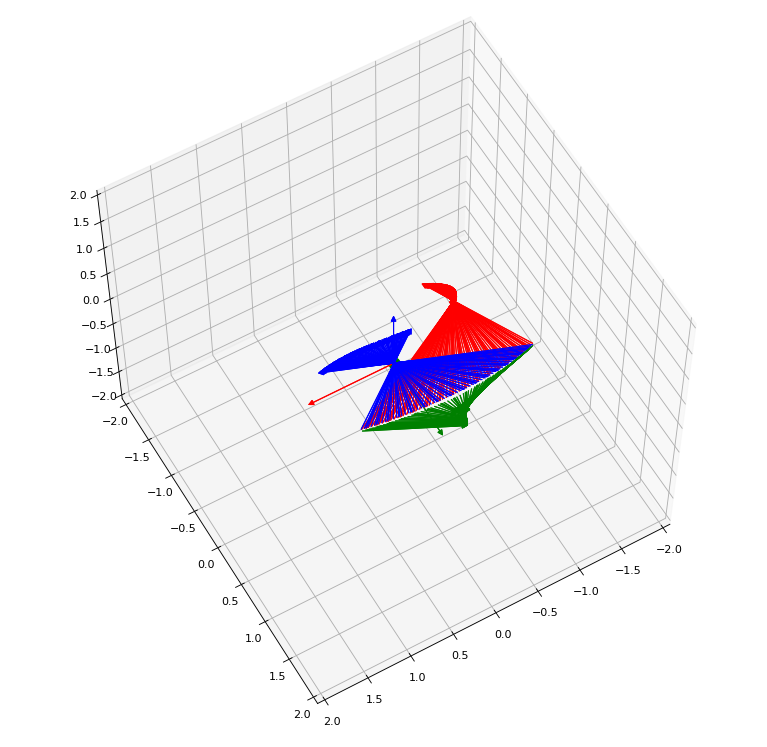

In [4]:
fig = plt.figure(num=None, figsize = (12,12), dpi = 80, facecolor ='w', edgecolor = 'k')
ax = fig.gca(projection='3d')
ax.set_xlim([-2.0,2.0])
ax.set_ylim([-2.0,2.0])
ax.set_zlim([-2.0,2.0])

ax.scatter([0],[0],[0],color="g",s=100)
vectors = create_points_on_circle(500, 1.0, 1.0)
draw_coordinate_system(np.eye(3), np.array([0.0, 0.0, 0.0]),fig, ax)
# # for v in vectors:
# #     draw_vector(v, "red", "", fig, ax)
curr_or = look_at(vectors[0], np.array([0.0, 0.0,0.0]), np.array([0.0, 1.0,0.0]))

# #ax.legend(handles =vector_handles,loc='upper left')
# plt.xlabel('x-axis')
# plt.ylabel('y-axis')

start = np.array([1.0, 1.0, 1.0])
end = np.array([-1.0, 1.0, 1.0])

pts = create_points_on_line(start, end, 100)
visualize_rodriguez_advanced_matrix_orientation(pts,  fig, ax)
# for pt in pts:
#     draw_vector(pt, "purple", "", fig, ax)

# u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
# x = np.cos(u)*np.sin(v)
# y = np.sin(u)*np.sin(v)
# z = np.cos(v)
# ax.plot_wireframe(x, y, z, color="gray")
ax.view_init(60, 60)
plt.show()

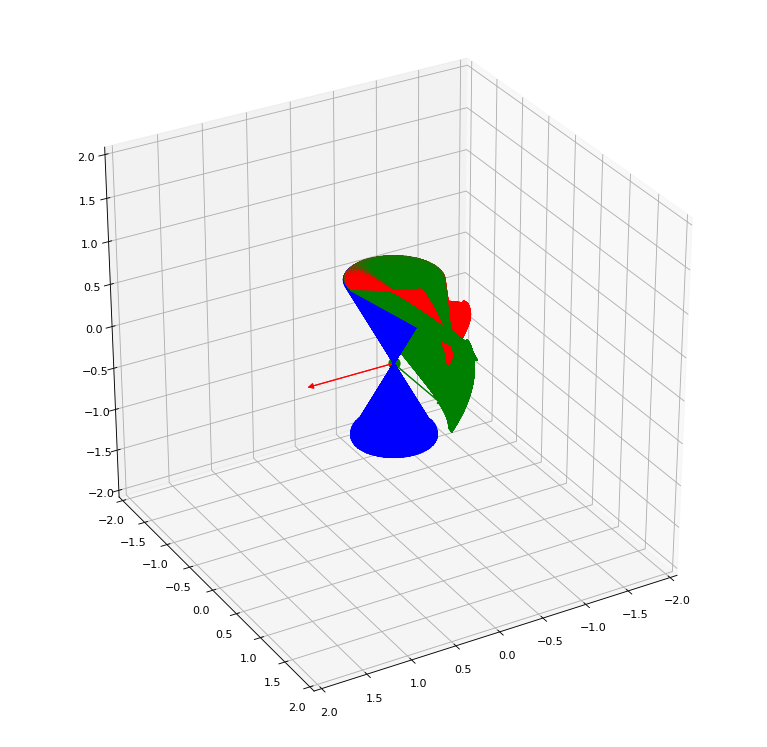

In [5]:
fig = plt.figure(num=None, figsize = (12,12), dpi = 80, facecolor ='w', edgecolor = 'k')
ax = fig.gca(projection='3d')
ax.set_xlim([-2.0,2.0])
ax.set_ylim([-2.0,2.0])
ax.set_zlim([-2.0,2.0])

ax.scatter([0],[0],[0],color="g",s=100)
vectors = create_points_on_circle(500, 1.0, 1.0)
draw_coordinate_system(np.eye(3), np.array([0.0, 0.0, 0.0]),fig, ax)
# # for v in vectors:
# #     draw_vector(v, "red", "", fig, ax)
curr_or = look_at(vectors[0], np.array([0.0, 0.0,0.0]), np.array([0.0, 1.0,0.0]))

# #ax.legend(handles =vector_handles,loc='upper left')
# plt.xlabel('x-axis')
# plt.ylabel('y-axis')

start = np.array([1.0, 1.0, 1.0])
end = np.array([-1.0, 1.0, 1.0])

pts = create_points_on_circle(500, 0.50, 1.0)
visualize_rodriguez_advanced_matrix_orientation(pts,  fig, ax)
# for pt in pts:
#     draw_vector(pt, "purple", "", fig, ax)

# u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
# x = np.cos(u)*np.sin(v)
# y = np.sin(u)*np.sin(v)
# z = np.cos(v)
# ax.plot_wireframe(x, y, z, color="gray")
ax.view_init(30, 60)
plt.show()

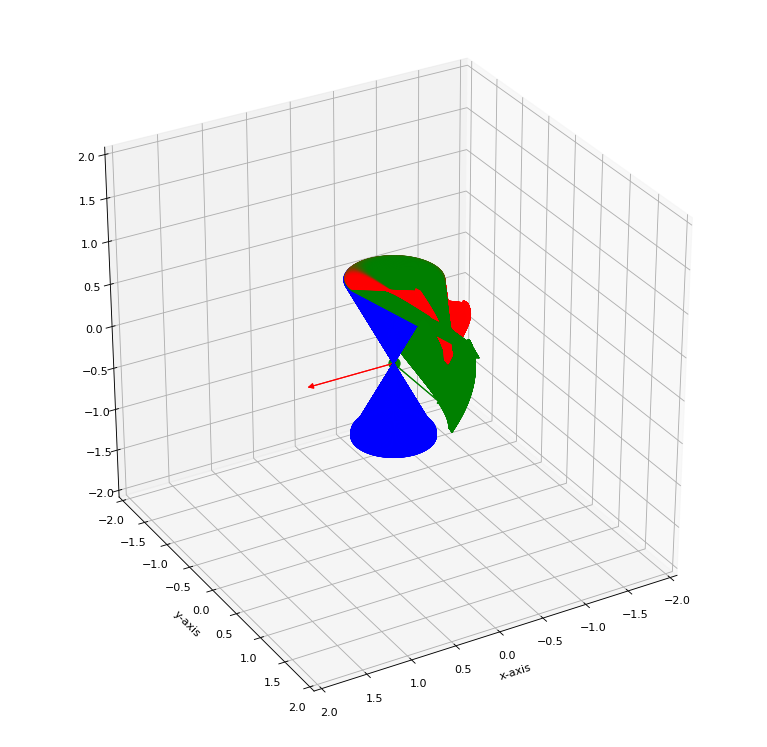

In [6]:
fig = plt.figure(num=None, figsize = (12,12), dpi = 80, facecolor ='w', edgecolor = 'k')
ax = fig.gca(projection='3d')
ax.set_xlim([-2.0,2.0])
ax.set_ylim([-2.0,2.0])
ax.set_zlim([-2.0,2.0])

ax.scatter([0],[0],[0],color="g",s=100)

draw_coordinate_system(np.eye(3), np.array([0.0, 0.0, 0.0]),fig, ax)

vectors = create_points_on_sphere(500, 1.0)

curr_or = look_at(vectors[0], np.array([0.0, 0.0,0.0]), np.array([0.0, 1.0,0.0]))
visualize_rodriguez_matrix_orientation(pts,  fig, ax)

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
#ax.plot_wireframe(x, y, z, color="gray")
ax.view_init(30, 60)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

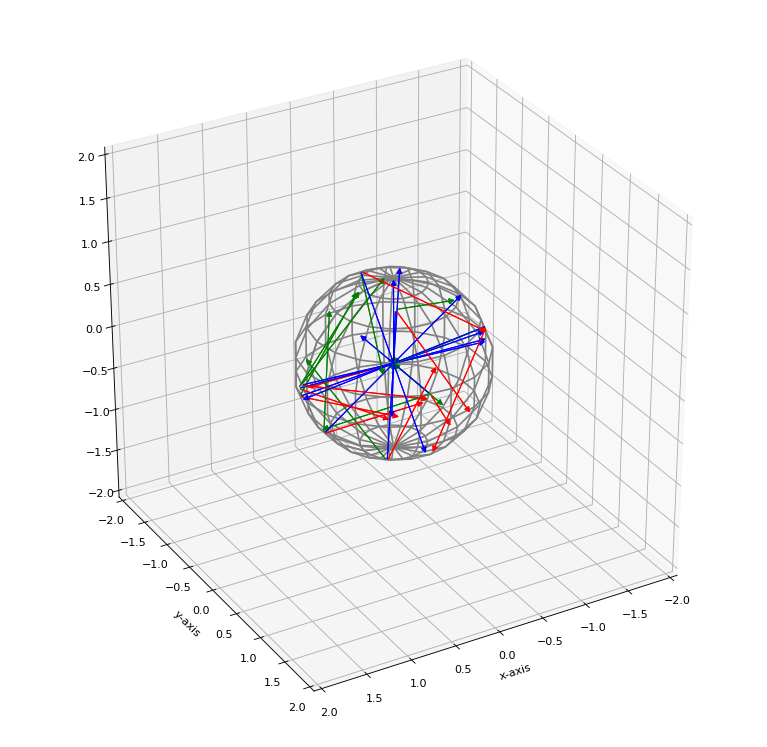

In [7]:
fig = plt.figure(num=None, figsize = (12,12), dpi = 80, facecolor ='w', edgecolor = 'k')
ax = fig.gca(projection='3d')
ax.set_xlim([-2.0,2.0])
ax.set_ylim([-2.0,2.0])
ax.set_zlim([-2.0,2.0])

ax.scatter([0],[0],[0],color="g",s=100)

draw_coordinate_system(np.eye(3), np.array([0.0, 0.0, 0.0]),fig, ax)

pts = create_points_on_sphere(10, 1.0)

curr_or = look_at(vectors[0], np.array([0.0, 0.0,0.0]), np.array([0.0, 1.0,0.0]))
visualize_rodriguez_matrix_orientation(pts,  fig, ax)

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="gray")
ax.view_init(30, 60)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

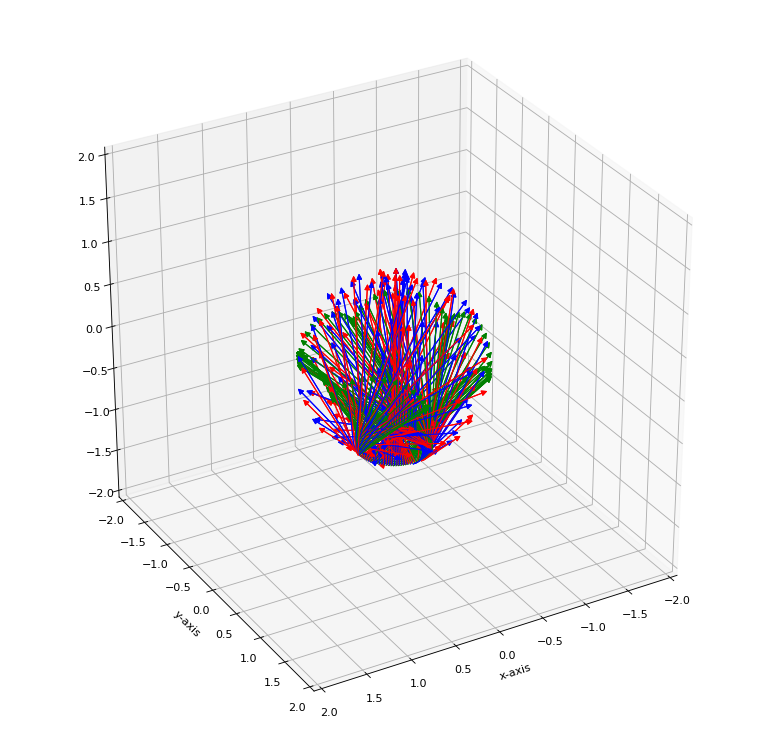

In [8]:
fig = plt.figure(num=None, figsize = (12,12), dpi = 80, facecolor ='w', edgecolor = 'k')
ax = fig.gca(projection='3d')
ax.set_xlim([-2.0,2.0])
ax.set_ylim([-2.0,2.0])
ax.set_zlim([-2.0,2.0])

ax.scatter([0],[0],[0],color="g",s=100)


number_vectors = 100
rad = 2 * np.pi / number_vectors
radius = 0.4
vectors = []


for i in range(number_vectors):
    x = np.cos(rad * i) * radius
    y = np.sin(rad * i) * radius
    z = -1.0
    vec = np.array([x,y,z])
    vectors.append(vec)

    
la_center = np.array([vectors[0].item(0), vectors[0].item(1), vectors[0].item(2)])
look_at_mat = look_at(la_center,np.array([0.0, 0.0, 0.0]), np.array([0.0, 1.0, 0.0]))    
draw_coordinate_system(look_at_mat, la_center, fig, ax)
                                           
for v in vectors:
    la_center = np.array([v.item(0), v.item(1), v.item(2)])
    look_at_mat = np.matmul(look_at_mat, look_at(la_center,np.array([0.0, 0.0, 0.0]), np.array([0.0, 1.0, 0.0])))    
    draw_coordinate_system(look_at_mat, la_center, fig, ax)

plt.xlabel('x-axis')
plt.ylabel('y-axis')
ax.view_init(30, 60)
plt.show()

In [9]:
import ipyvolume as ipv


start_vec = np.array([-2,2,1])
end_vec = np.array([2,2,1])

vectors = create_points_on_line(start_vec, end_vec, 100)

vec_orientation = []
vec_orientation.append(vectors[0])

for i in range(1, len(vectors)):
    vec_orientation.append(calculate_rodriguez_formular_vector_form(vectors[i-1], vectors[i]))


x= np.zeros(shape=(1,len(vectors))) 
y= np.zeros(shape=(1,len(vectors))) 
z= np.zeros(shape=(1,len(vectors))) 
u= np.zeros(shape=(1,len(vectors))) 
v= np.zeros(shape=(1,len(vectors)))
w= np.zeros(shape=(1,len(vectors)))     

for i in range(len(vectors)):
    x.itemset((i), vectors[i].item(0))
    np.transpose(x)
    y.itemset((i), vectors[i].item(1))
    np.transpose(y)
    z.itemset((i), vectors[i].item(2))
    np.transpose(z)
    u.itemset((0,i), -vec_orientation[i].item(0))
    np.transpose(u)
    v.itemset((0,i), -vec_orientation[i].item(1))
    np.transpose(v)
    w.itemset((0,i), -vec_orientation[i].item(2))
    np.transpose(w)
    
x = np.transpose(x)
y = np.transpose(y)
z = np.transpose(z)
u = np.transpose(u)
v = np.transpose(v)
w = np.transpose(w)

quiver = ipv.quiver(x, y, z, u, v, w, size=15)
ipv.xyzlim(-2,2)
ipv.animation_control(quiver, interval=200)

In [10]:
vectors = create_points_on_circle(100, 1.0, 1)

vec_orientation = []
vec_orientation.append(vectors[0])

for i in range(1, len(vectors)):
    vec_orientation.append(calculate_rodriguez_formular_vector_form(vectors[i-1], vectors[i]))

x= np.zeros(shape=(1,len(vectors))) 
y= np.zeros(shape=(1,len(vectors))) 
z= np.zeros(shape=(1,len(vectors))) 
u= np.zeros(shape=(1,len(vectors))) 
v= np.zeros(shape=(1,len(vectors)))
w= np.zeros(shape=(1,len(vectors)))     

for i in range(len(vectors)):
    x.itemset((i), vectors[i].item(0))
    np.transpose(x)
    y.itemset((i), vectors[i].item(1))
    np.transpose(y)
    z.itemset((i), vectors[i].item(2))
    np.transpose(z)
    u.itemset((0,i), -vec_orientation[i].item(0))
    np.transpose(u)
    v.itemset((0,i), -vec_orientation[i].item(1))
    np.transpose(v)
    w.itemset((0,i), -vec_orientation[i].item(2))
    np.transpose(w)
    
x = np.transpose(x)
y = np.transpose(y)
z = np.transpose(z)
u = np.transpose(u)
v = np.transpose(v)
w = np.transpose(w)

quiver = ipv.quiver(x, y, z, u, v, w, size=15)
ipv.xyzlim(-2,2)
ipv.animation_control(quiver, interval=200)
ipv.show()

In [11]:
print(np.random.random((6, 10))*2-1)

[[-0.9380106    0.462972379  0.122789112 -0.669416906 -0.107512635
  -0.028345249  0.483697524  0.017029823 -0.059868018  0.595420691]
 [-0.694648241  0.880122573  0.068622942 -0.284415601 -0.579699453
  -0.071015186 -0.681200667 -0.336097948 -0.739107127  0.567276776]
 [-0.387850931 -0.962756512  0.071660988 -0.027079106 -0.869174637
   0.662732478 -0.933360622  0.610891388 -0.452347748 -0.846676446]
 [-0.964798922 -0.214724967  0.28879053  -0.981025296 -0.858210966
   0.760867117 -0.891847869  0.261062189  0.171174377 -0.632930642]
 [-0.376446881 -0.243402525 -0.187333146 -0.333742635  0.09548382
  -0.135172164  0.620557448  0.152222257 -0.225389564 -0.137206273]
 [ 0.219267828  0.773557915  0.048139409 -0.902005859 -0.624737473
  -0.232302443 -0.453931026  0.781386195  0.066798216 -0.318282131]]
